In [56]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [57]:
image = cv2.imread(r"C:\Users\kabil\Desktop\stoke-prediction\processing\dataset\spot.jpg",1)

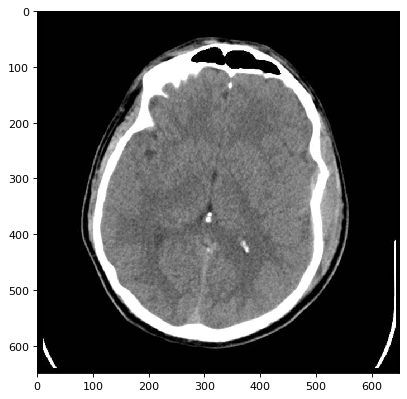

In [58]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(image);

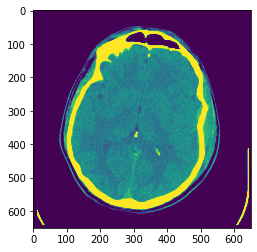

In [59]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

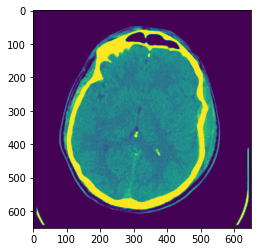

In [60]:
blurred = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(blurred)

In [61]:
min_x = image.shape[0]
min_y = image.shape[1]
max_x = 0
max_y = 0

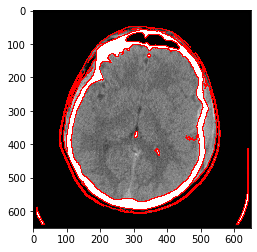

In [62]:
canny = cv2.Canny(blurred,0,250)
(cnts,_) = cv2.findContours(canny.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
coints = image.copy()
frame = image.copy()
cv2.drawContours(frame,cnts,-1,(255,0,0),2)
plt.imshow(frame)

10 588
10 588
153 519
146 511
363 413
605 411
605 411
302 362
302 362
478 345
90 192
82 186
78 135
342 128
342 129
255 127
490 511
493 143
162 124
112 117
223 113
278 101
171 98
420 74
452 104
276 66
276 66
384 63
253 61
100 54
199 48


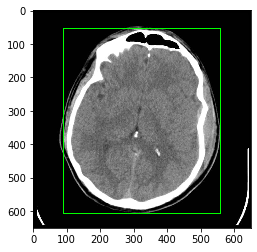

In [63]:

for cnt in cnts:
    x ,y,w,h = cv2.boundingRect(cnt)
    area = w * h
    print(x , y)
    if area > ((image.shape[0] * image.shape[1]) * 0.2):
        if min_x > x:
            min_x = x
        if min_y > y:
            min_y = y
        if max_x < (x + w):
            max_x = x + w
        if max_y < (y + h):
            max_y = y +h
            
cv2.rectangle(coints,(min_x,min_y),(max_x,max_y),(0,255,0),2)
plt.imshow(coints)

In [64]:
roi = image[min_y:max_y,min_x:max_x]

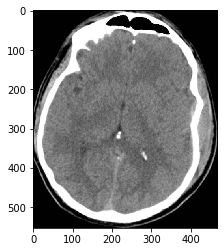

In [65]:
plt.imshow(roi)

In [66]:
cv2.imwrite("result.jpg",roi)

True